# Logistic Regression
 - create a toy dataset: define two 2D space gaussians and sample 250 instances of each (total 500).
 - implement the iterative reweighted least squares method and plot the logistic seperation line.
 - Use sklearn's builtin method as well.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
mean1 = (1,1)
mean2 = (4,4)
cov = [[1,0],[0,100]] #c_ii is the variance

d1 = np.random.multivariate_normal(mean1, cov, 250)
d2 = np.random.multivariate_normal(mean2, cov, 250)

data = np.concatenate([d1,d2])

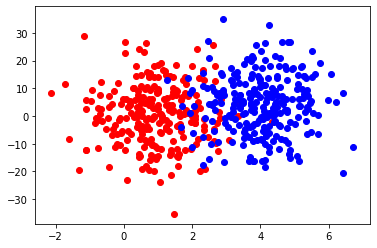

In [15]:
x1,y1 = d1.T
x2,y2 = d2.T
plt.scatter(x1,y1, color='r')
plt.scatter(x2,y2, color='b')

plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

gold1 = [0] * 250
gold2 = [1] * 250
gold = gold1 + gold2

logreg = LogisticRegression()
logreg.fit(data, gold)

preds = logreg.predict(data)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
print(f'mse of sklearn logistic regression is {mean_squared_error(gold,preds)}')

mse of sklearn logistic regression is 0.064


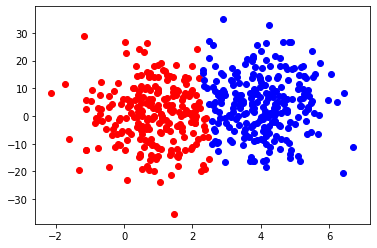

In [18]:
d1_pred = [data[i] for i in range(len(data)) if not preds[i]]
d2_pred = [data[i] for i in range(len(data)) if preds[i]]

x1,y1 = zip(*d1_pred)
x2,y2 = zip(*d2_pred)

plt.scatter(x1,y1, color='r')
plt.scatter(x2,y2, color='b')

plt.show()

# KNN
- implement the KNN algorithm by yourself.
- load the 'iris' dataset from sklearn. Split the data into 80% train and 20% test and apply KNN the classify the 20%.
- Examine different K values and plot your accuracy.

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

In [20]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df['type'] = pd.DataFrame(iris.target)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,type
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [22]:
x=df.iloc[:,:4]
y=df['type']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [23]:
K = list(range(1,100,5))
K_preds = []
K_acc = []

for k in K:
    preds = []
    knc=KNeighborsClassifier(n_neighbors=k)
    knc.fit(x_train,y_train)
    preds = knc.predict(x_test)
    K_preds.append(preds)
    K_acc.append(accuracy_score(y_true=y_test,y_pred=preds))

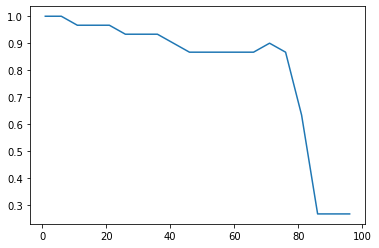

In [24]:
plt.plot(K,K_acc)

plt.show()



